# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

## 5.1 Скрипт называется - Task_5_script.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [22]:
data = pd.read_csv('messages.csv', names=['date', 'message']).dropna()
date_info = pd.DataFrame(list(data['date'].str.split()), columns=['date', 'time'])

In [3]:
data

,date,message
0,2023-01-07 18:00:00+00:00,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...
1,2023-01-02 06:30:00+00:00,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...
2,2023-01-02 00:32:16+00:00,"Ж, 20 лет, умеренный аллергик. Сделала Спутник..."
3,2022-12-31 19:53:12+00:00,"M40, без хронических болезней, в феврале 2022 ..."
4,2022-12-31 14:06:17+00:00,"#ревак #назально #спутник\n\nЖ53, ковидом не б..."
...,...,...
25137,2020-12-09 17:07:46+00:00,"Есть примеры, уже появлялись"
25138,2020-12-09 17:07:12+00:00,Если денег не жалко
25139,2020-12-09 17:06:53+00:00,Не рано?
25140,2020-12-09 17:06:36+00:00,Через 2 недели обычно сдают


### 5.1 График числа сообщений в зависимости от даты

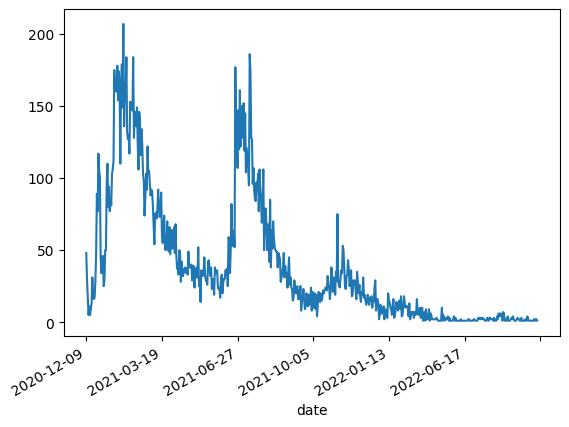

In [4]:
date_info.groupby('date').size().plot()
plt.gcf().autofmt_xdate()

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

### 5.2.1 Извлечение информации о возрасте и поле (если такой информации нет, сообщение игнорируется)

In [23]:
def parse_data(data):
    data = data[data['message'].str.contains('Ж|М|м|ж')]
    data = data[data['message'].str.contains('[0-9]')]
    
    data['personal_info'] = data['message'].str.extract('([МЖмж].[0-9].)')
    data['personal_info'] = data['personal_info'].str.upper()
    
    data['age'] = data['personal_info'].str.extract('([0-9][0-9])')
    data['gender'] = data['personal_info'].str.extract('([МЖмж])')
    data = data.drop('personal_info', axis=1)
    data = data.dropna()
    return data

In [24]:
data = parse_data(data)
data

,date,message,age,gender
4,2022-12-31 14:06:17+00:00,"#ревак #назально #спутник\n\nЖ53, ковидом не б...",53,Ж
8,2022-12-25 11:24:02+00:00,#назально #ревак #спутник-V\nМ33. 1 комп.: лег...,33,М
10,2022-12-19 14:35:43+00:00,#назально #ревак. Ж35. Хр. Заболевания: полива...,35,Ж
12,2022-12-12 23:10:46+00:00,#дети\nМ 13 лет. спутник м. \n1я доза 23.10.2...,13,М
13,2022-12-09 07:23:43+00:00,#ревак #назально #спутник \nМ 49 вторая доза...,49,М
...,...,...,...,...
25084,2020-12-10 11:17:32+00:00,Ж.47 Сутки после вакцинации (9.12.20). К ве...,47,Ж
25092,2020-12-10 05:00:09+00:00,М 48. Без симтомов. Тест на 30 день. вакцина 1...,48,М
25095,2020-12-09 20:05:05+00:00,М37. Первый компонент 03.12.2020 в 17:00. Чере...,37,М
25100,2020-12-09 19:11:56+00:00,Расскажу первые ощущение на свежую голову про ...,38,М


### 5.2.1 Диаграммы распределения по возрасту и полу

<AxesSubplot: xlabel='age'>

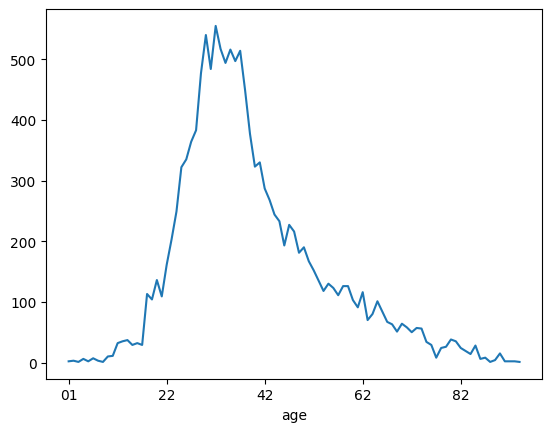

In [9]:
data.groupby(['age']).size().plot()

<AxesSubplot: >

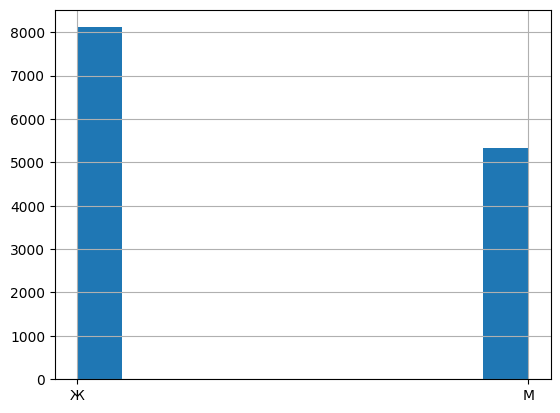

In [8]:
data['gender'].hist()

### 5.2.2 Число привитых астматиков в зависимости от возраста и пола

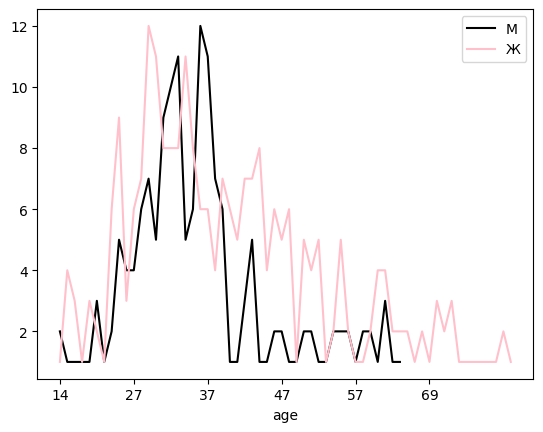

In [28]:
data_astma = data[data['message'].str.contains('астма')]

data_for_plot = data_astma.groupby(['gender','age']).size()
data_for_plot['М'].plot(color='black')
data_for_plot['Ж'].plot(color='pink')
plt.legend(['М', 'Ж'])
plt.show()